In [633]:
import pandas as pd
import numpy as np

#for box-cox transformation
from scipy import stats

#for min_max scaling
from mlxtend.preprocessing import minmax_scaling

#Plotting modules
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [634]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [635]:
print(df.describe())
print(df.shape)

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

In [636]:
#Total missing values
total_cells = np.product(df.shape)
total_missing = df.isnull().sum().sum()

In [637]:
#Percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


C:\Users\nnyen\AppData\Local\Temp\ipykernel_16168\2342998565.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X1 transaction date'], ax=ax[0], kde=True)
C:\Users\nnyen\AppData\Local\Temp\ipykernel_16168\2342998565.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_data['X1 transac

Text(0.5, 1.0, 'Scaled Data')

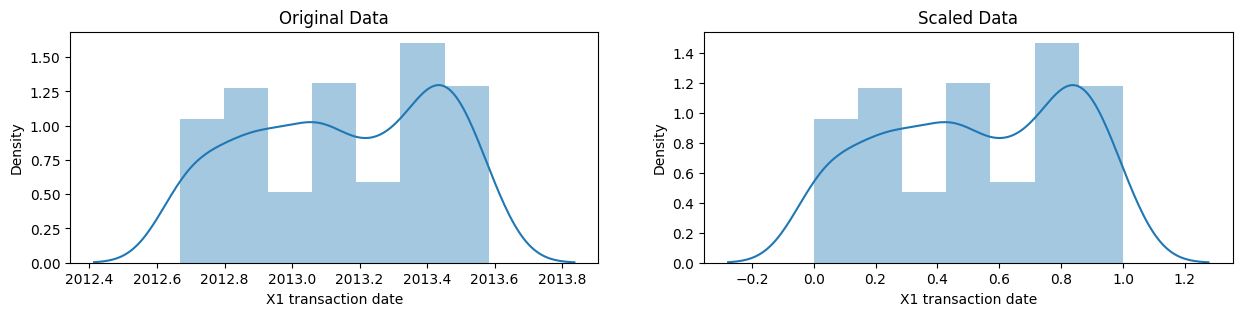

In [638]:
#scale the data
scaled_data = minmax_scaling(df, columns=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area'])

#plot the original data and the scaled data
fig, ax = plt.subplots(1,2, figsize=(15,3))
sns.distplot(df['X1 transaction date'], ax=ax[0], kde=True)
ax[0].set_title("Original Data")
sns.distplot(scaled_data['X1 transaction date'], ax=ax[1],kde=True)
ax[1].set_title("Scaled Data")



In [639]:
#
X = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']


Usage of Decision Tree

In [640]:
#
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#Regression tree
from sklearn.tree import DecisionTreeRegressor


In [641]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [642]:
from sklearn.metrics import mean_absolute_error
def get_mae(max_leaf_nodes,X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return mae

In [643]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size,X_train, X_test, y_train, y_test) for leaf_size in candidate_max_leaf_nodes}
best_tree_size = min(scores, key=scores.get)
print(best_tree_size)

50


In [644]:
#Fit the model with best_tree_size. Fill in argument to make optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X_train, y_train)
predicted_prices = final_model.predict(X_test)
mae = mean_absolute_error(y_test, predicted_prices)
print(mae)


5.35693053000178


Using Random Forest

In [645]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=1)
RF.fit(X_train, y_train)
RF_predict = RF.predict(X_test)
RF_mae = mean_absolute_error(y_test, RF_predict)
print(RF_mae)

5.2452048192771095
